<a href="https://colab.research.google.com/github/kimjaehwankimjaehwan/Economics/blob/main/Exchange_rate(USD_JPY)_%26_Inflation_rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1. 데이터 가져오기
먼저, pandas_datareader와 yfinance를 사용해 인플레이션율과 환율 데이터를 가져옵니다.

In [ ]:
import pandas_datareader.data as web
import yfinance as yf
import datetime
import matplotlib.pyplot as plt

start = datetime.datetime(2020, 1, 1)
end = datetime.datetime(2023, 8, 1)

# 인플레이션 데이터 가져오기 (미국 CPI)
us_inflation = web.DataReader('CPIAUCSL', 'fred', start, end)

# 누적 인플레이션 계산 (기준을 첫 달로 설정)
us_inflation['Cumulative_Inflation'] = us_inflation['CPIAUCSL'] / us_inflation['CPIAUCSL'].iloc[0]

usd_jpy = yf.download('JPY=X', start=start, end=end)['Adj Close']

data = us_inflation.join(usd_jpy, how='inner')
data.columns = ['CPI', 'Cumulative_Inflation', 'USD_JPY_Exchange_Rate']


[*********************100%%**********************]  1 of 1 completed


##2. 구매력 평가(PPP) 분석
구매력 평가(PPP) 이론에 따라 실질 환율을 계산하고 분석합니다.

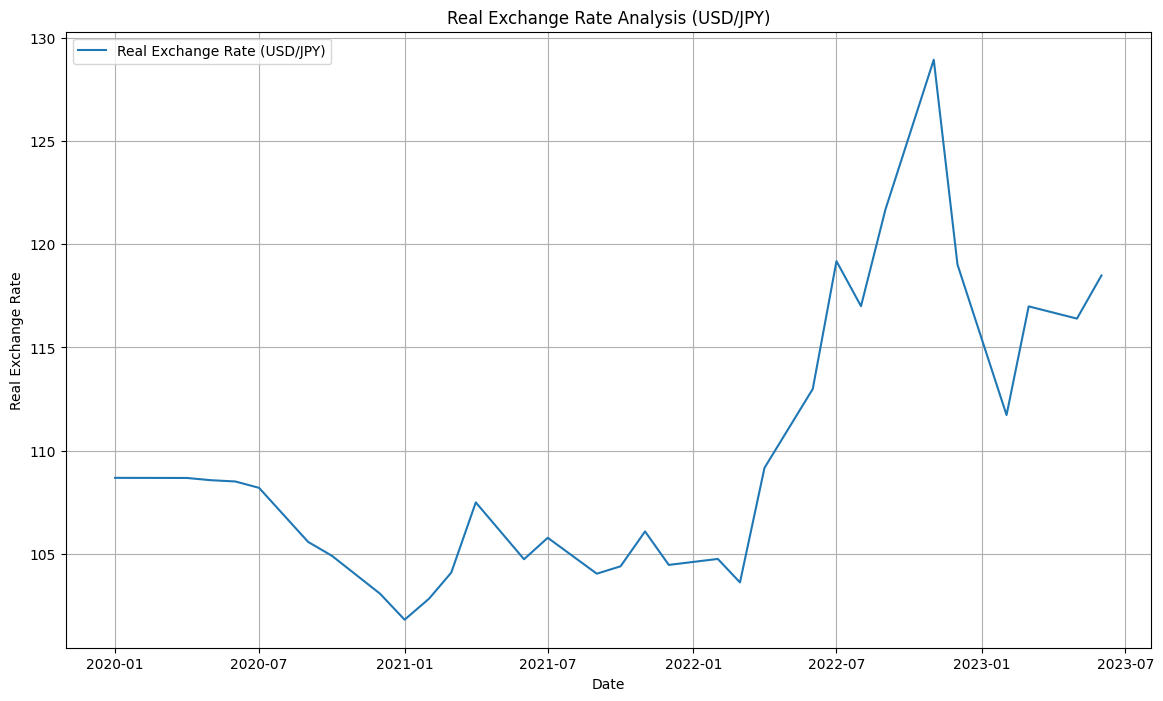

In [ ]:
# 실질 환율 계산
data['Real_Exchange_Rate'] = data['USD_JPY_Exchange_Rate'] / data['Cumulative_Inflation']

# 실질 환율 시각화
plt.figure(figsize=(14, 8))
plt.plot(data.index, data['Real_Exchange_Rate'], label='Real Exchange Rate (USD/JPY)')
plt.title('Real Exchange Rate Analysis (USD/JPY)')
plt.xlabel('Date')
plt.ylabel('Real Exchange Rate')
plt.legend()
plt.grid(True)
plt.show()


###그래프 해석

1. 초기 안정기(2020년~2021년 초반): 그래프의 초기 구간(2020년 초부터 2021년 초반까지)은 비교적 안정적인 실질 환율을 보여주고 있습니다. 이는 해당 기간 동안 미국의 인플레이션과 엔화 대비 달러의 환율이 큰 변동 없이 안정적으로 유지되었음을 의미할 수 있습니다.

2. 하락기(2021년 초반~2021년 중반): 2021년 초반부터 중반까지 실질 환율이 하락하는 모습이 나타납니다. 이는 이 기간 동안 달러가 엔화 대비 약세를 보였거나, 미국의 인플레이션이 상대적으로 낮았음을 나타낼 수 있습니다.

3. 상승기(2021년 말~2023년 초반): 2021년 말부터 2023년 초반까지 실질 환율이 급격히 상승하고 있습니다. 이는 달러가 엔화 대비 강세를 보이거나, 미국의 인플레이션이 상승한 것에 대한 반응일 수 있습니다. 특히 2022년 중반부터 2023년 초까지 실질 환율의 급등은 글로벌 경제 상황, 미국의 금리 인상, 일본의 통화정책 등 다양한 요인에 기인할 수 있습니다.

##3. 환율과 인플레이션의 상관관계 분석

Correlation between Inflation Change and Exchange Rate Change: 0.15


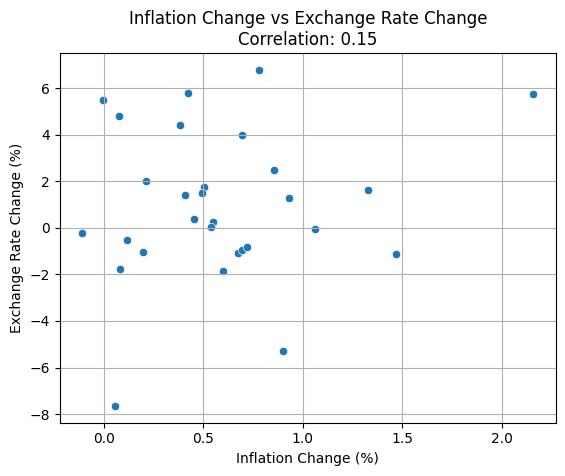

In [ ]:
import pandas as pd
import seaborn as sns
from scipy.stats import pearsonr

data['Inflation_Change'] = data['Cumulative_Inflation'].pct_change() * 100  # 인플레이션 변화율 (%)
data['Exchange_Rate_Change'] = data['USD_JPY_Exchange_Rate'].pct_change() * 100  # 환율 변화율 (%)

data.dropna(inplace=True)

# 상관계수 계산 (피어슨 상관계수)
correlation, _ = pearsonr(data['Inflation_Change'], data['Exchange_Rate_Change'])
print(f"Correlation between Inflation Change and Exchange Rate Change: {correlation:.2f}")

sns.scatterplot(x='Inflation_Change', y='Exchange_Rate_Change', data=data)
plt.title(f'Inflation Change vs Exchange Rate Change\nCorrelation: {correlation:.2f}')
plt.xlabel('Inflation Change (%)')
plt.ylabel('Exchange Rate Change (%)')
plt.grid(True)
plt.show()

###상관관계 해석
  - 상관계수(0.15): 0에 가까운 값일수록 상관관계가 거의 없음을 나타냅니다. 이 경우, 상관관계가 거의 없으므로 인플레이션 변화와 환율 변화 간의 직접적인 관계는 약하다고 할 수 있습니다.
  - 산점도: 산점도에서도 데이터 포인트들이 비교적 넓게 분포되어 있으며, 뚜렷한 패턴이 나타나지 않음을 알 수 있습니다.

### 환율 예측 모델 구축(단순선형회귀)

Mean Squared Error: 49.05
R^2 Score: -0.59


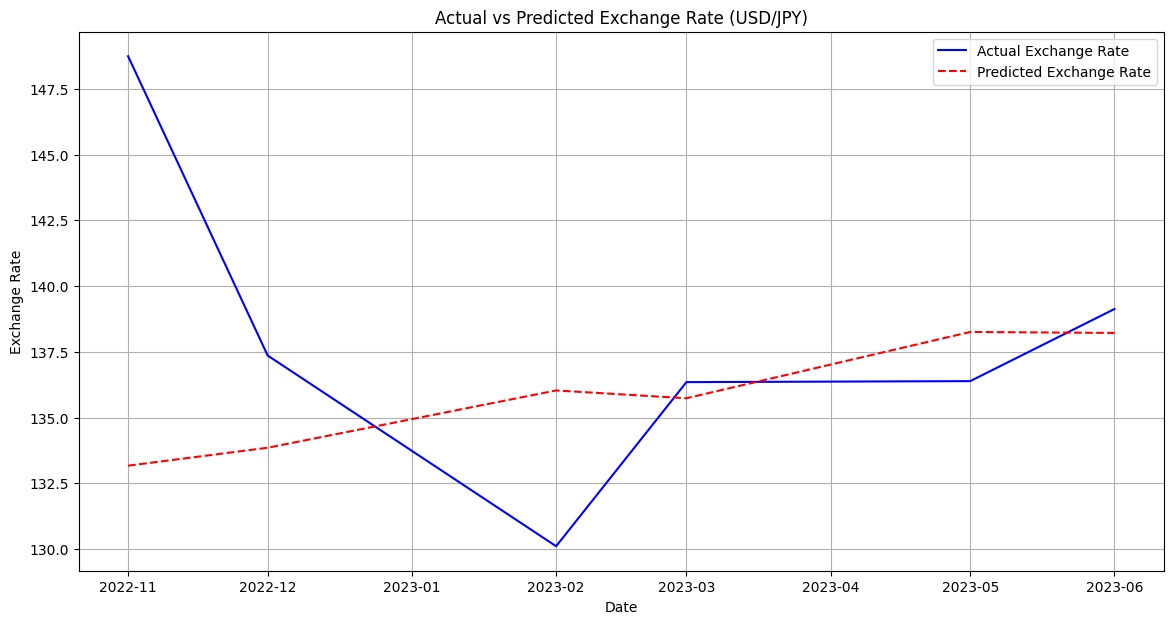

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = data[['Inflation_Change', 'Cumulative_Inflation']].shift(1).dropna()
y = data['USD_JPY_Exchange_Rate'].iloc[1:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')

plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual Exchange Rate', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Exchange Rate', color='red', linestyle='--')
plt.title('Actual vs Predicted Exchange Rate (USD/JPY)')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True)
plt.show()


##5. 이자율 평형 이론(IRP) 분석
이자율 평형 이론에 따라 환율과 인플레이션 간의 관계를 분석합니다.

Correlation between US Inflation and USD/JPY Exchange Rate Change: 0.20


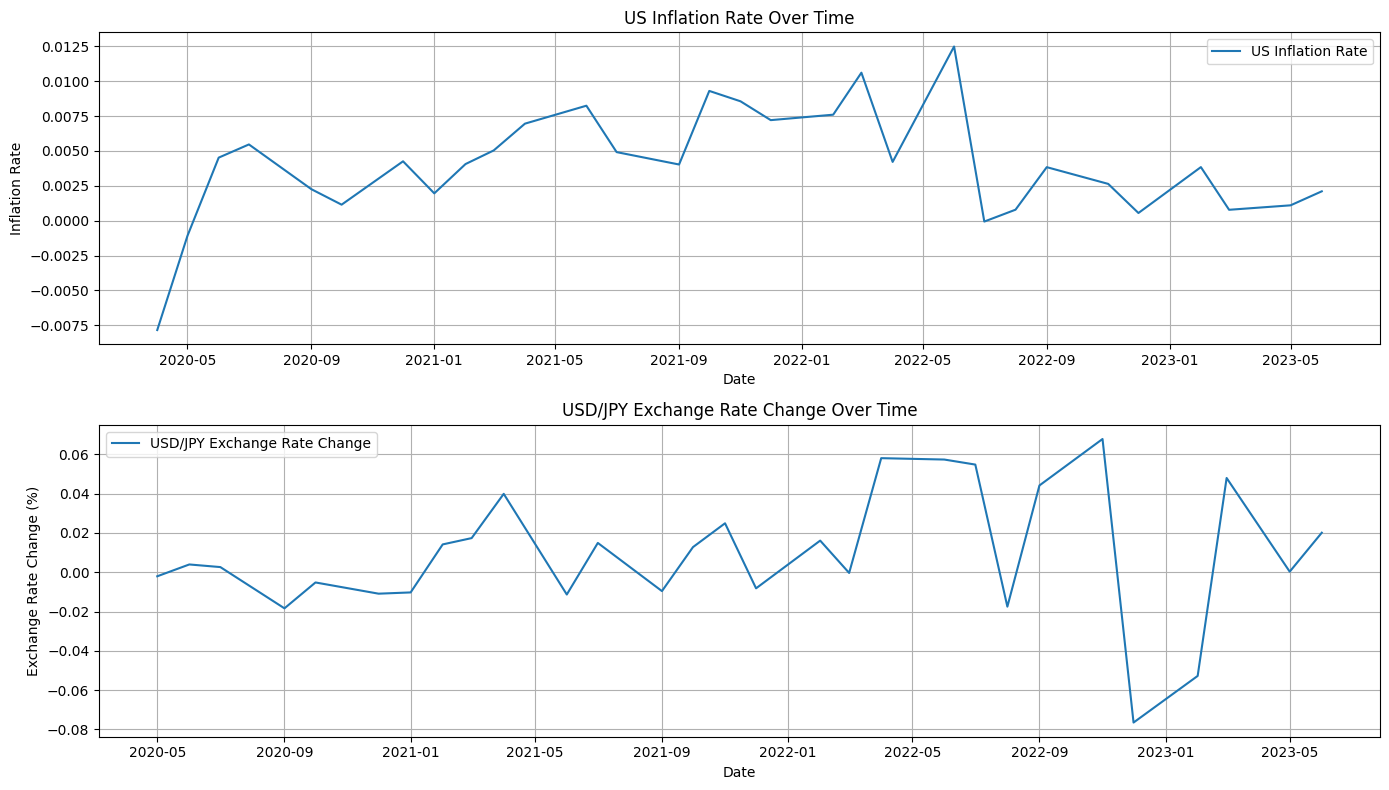

In [ ]:
# 환율 변화율 계산
data['Exchange_Rate_Change'] = data['USD_JPY_Exchange_Rate'].pct_change()

# 인플레이션율 변화와 환율 변화율 간의 상관관계 분석
correlation = data[['US_Inflation', 'Exchange_Rate_Change']].corr().iloc[0, 1]
print(f"Correlation between US Inflation and USD/JPY Exchange Rate Change: {correlation:.2f}")


plt.figure(figsize=(14, 8))
plt.subplot(2, 1, 1)
plt.plot(data.index, data['US_Inflation'], label='US Inflation Rate')
plt.title('US Inflation Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Inflation Rate')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(data.index, data['Exchange_Rate_Change'], label='USD/JPY Exchange Rate Change')
plt.title('USD/JPY Exchange Rate Change Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate Change (%)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


### 상관관계 해석
  - 상관계수(0.20): 상관계수 0.20은 인플레이션과 환율 변화 간의 관계가 미미하다는 것을 보여줍니다. 즉, 인플레이션율이 변동할 때 환율이 그에 따라 움직이긴 하지만, 다른 외부 요인들이 더 강하게 작용하고 있을 가능성이 큽니다.

  - 그래프 해석: 인플레이션율과 환율 변화율을 시각화한 그래프에서도 이러한 관계가 잘 드러납니다. 각 변수의 변화 패턴이 비슷할 때도 있지만, 인플레이션과 환율이 항상 동일한 방향으로 움직이지는 않습니다.

###비선형 모델을 사용한 환율 예측 코드(랜덤 포레스트)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Best Parameters: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-Validation Score (R^2): -6.60


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Test Mean Squared Error: 39.53
Test R^2 Score: -0.29


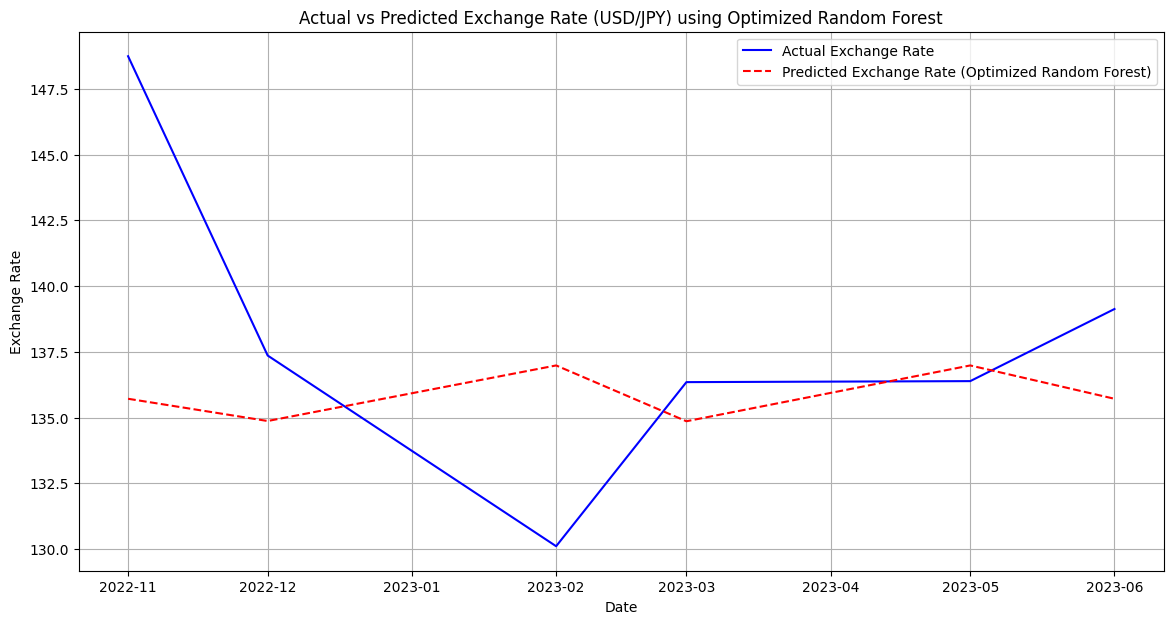

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor


data['Inflation_Change'] = data['Cumulative_Inflation'].pct_change() * 100
data['Exchange_Rate_Change'] = data['USD_JPY_Exchange_Rate'].pct_change() * 100
data.dropna(inplace=True)

X = data[['Inflation_Change', 'Cumulative_Inflation']].shift(1).dropna()
y = data['USD_JPY_Exchange_Rate'].iloc[1:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

rf_model = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=5, n_jobs=-1, scoring='r2', verbose=2)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Score (R^2): {best_score:.2f}")

best_rf_model = grid_search.best_estimator_
best_rf_model.fit(X_train, y_train)

y_pred = best_rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Test Mean Squared Error: {mse:.2f}')
print(f'Test R^2 Score: {r2:.2f}')

plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual Exchange Rate', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Exchange Rate (Optimized Random Forest)', color='red', linestyle='--')
plt.title('Actual vs Predicted Exchange Rate (USD/JPY) using Optimized Random Forest')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True)
plt.show()



###XGBoost를 사용한 환율 예측 코드

In [ ]:
pip install xgboost


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1.0}
Best Cross-Validation Score (R^2): -6.64
Test Mean Squared Error: 135.08
Test R^2 Score: -13.53


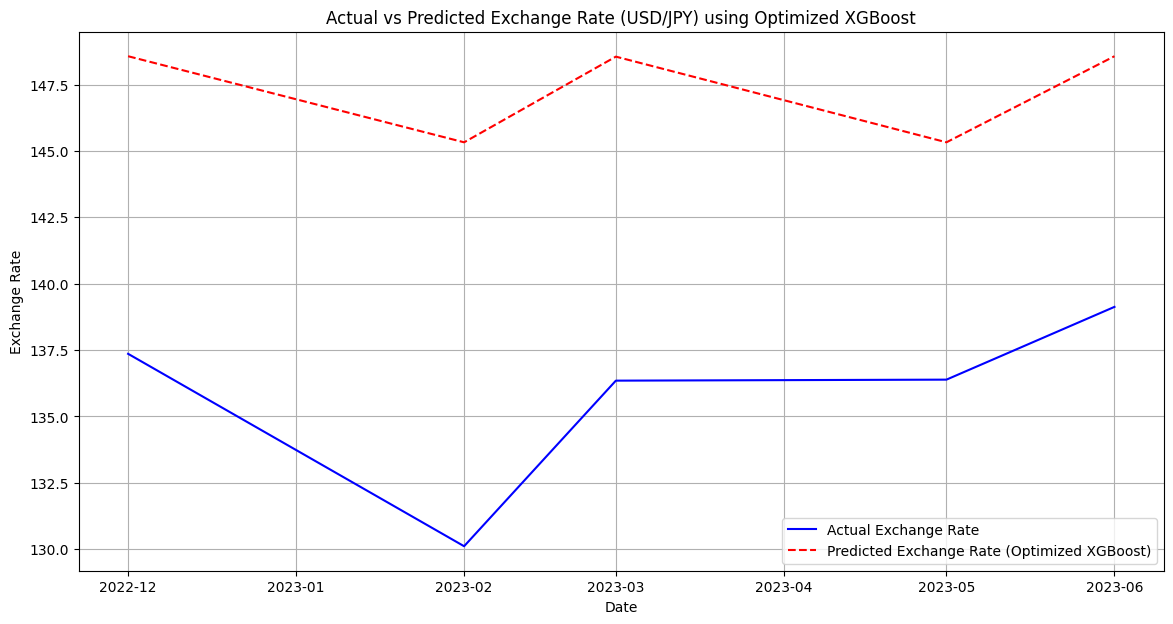

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor

data['Inflation_Change'] = data['Cumulative_Inflation'].pct_change() * 100
data['Exchange_Rate_Change'] = data['USD_JPY_Exchange_Rate'].pct_change() * 100
data.dropna(inplace=True)


X = data[['Inflation_Change', 'Cumulative_Inflation']].shift(1).dropna()
y = data['USD_JPY_Exchange_Rate'].iloc[1:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                           cv=5, n_jobs=-1, scoring='r2', verbose=2)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Score (R^2): {best_score:.2f}")

best_xgb_model = grid_search.best_estimator_
best_xgb_model.fit(X_train, y_train)

y_pred = best_xgb_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Test Mean Squared Error: {mse:.2f}')
print(f'Test R^2 Score: {r2:.2f}')

plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual Exchange Rate', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Exchange Rate (Optimized XGBoost)', color='red', linestyle='--')
plt.title('Actual vs Predicted Exchange Rate (USD/JPY) using Optimized XGBoost')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True)
plt.show()


## 결론
###=> Inflation으로 USD/JPY 환율을 예측하는 것은 무리이며, 인플레이션률과 환율만으로 어느 한 변수를 설명하는 것은 부족하다